In [90]:
# IMPORTING ALL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [91]:
# IMPORTING DATA and SEPARATING INPUT AND OUTPUT DATA

df = pd.read_csv('Airline_customer_satisfaction.csv')
df = df.dropna()
y = df['satisfaction']
x = df.drop('satisfaction', axis = 1)

In [92]:
# PREPROCESSING THE DATA

#one hot encoding
x = pd.get_dummies(x)
bool_col = x.select_dtypes(include = ['bool']).columns
x[bool_col] = x[bool_col].astype(int)

#normalization
for col in x.columns:
    x[col] = x[col]/ x[col].abs().max()

y = y.map({'satisfied': 0, 'dissatisfied' : 1})
x = x.dropna()
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [93]:
# SPLITTING THE DATA
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [103]:
model = LogisticRegression()

In [107]:

model.fit(x_train, y_train)

LogisticRegression()

In [108]:
p = model.predict(x_test)

In [109]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, p)
cnf_matrix

array([[17879,  3298],
       [ 3345, 14325]])

Text(0.5, 427.9555555555555, 'Predicted label')

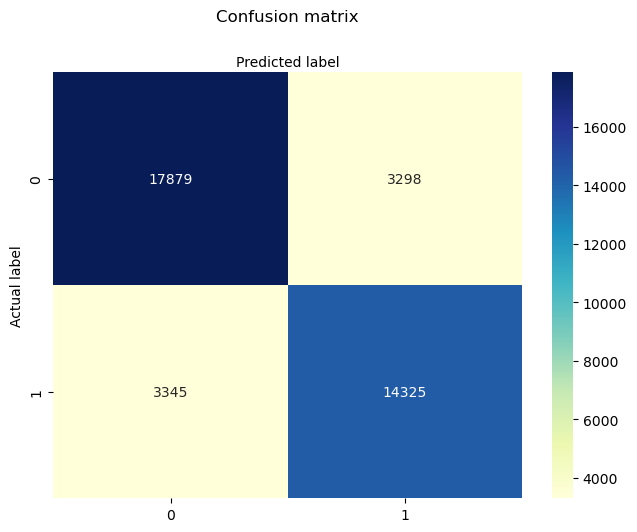

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')